In [45]:
import pandas as pd
import numpy as np
import inspect
from sklearn.linear_model import LinearRegression as regress
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

In [46]:
data = pd.read_excel('tutorial1.xlsx')
print(data)
Y = data.iloc[:,0].values


x1 = data.iloc[:,1].values #Operating voltage
x2 = data.iloc[:,2].values
x3 = data.iloc[:,3].values
ones_col = np.ones(np.size(x1))
#Calculation of coefficients for linear terms
XL = np.column_stack((x1,x2,x3))


      y   x1    x2   x3
0  2145  110   750  140
1  2155  110   850  180
2  2220  110  1000  140
3  2225  110  1100  180
4  2260  120   750  140
5  2266  120   850  180
6  2334  120  1000  140
7  2340  130  1000  180
8  2212  115   840  150
9  2180  115   880  150


In [47]:
model = regress().fit(XL,Y)
b0 = model.intercept_
linear = model.coef_
b1 = linear[0]
b2 = linear[1]
b3 = linear[2]


linear_coeff = [b0,b1,b2,b3]


In [48]:
print('The coefficients for the linear model are: \n b0 = {} \n b1 = {} \n b2 = {} \n b3 = {} \n\n'.format(b0,b1,b2,b3))


print('The equation is: \n Y = {} + {}*X1 + {}*X2 + {}*X3'.format(b0,b1,b2,b3))

The coefficients for the linear model are: 
 b0 = 1108.7244911480202 
 b1 = 8.639331823916764 
 b2 = 0.2607707242318972 
 b3 = -0.7114061770856739 


The equation is: 
 Y = 1108.7244911480202 + 8.639331823916764*X1 + 0.2607707242318972*X2 + -0.7114061770856739*X3


# a) 

In [49]:
xnl_a = np.column_stack((x1, x2, x3, x1**2, x2**2, x3**2, x1*x2, x2*x3, x1*x3, x1*x2*x3))
xnl_a.shape

(10, 10)

In [6]:
model2 = regress().fit(xnl_a, Y)

In [7]:
b0_a = model2.intercept_

In [8]:
print(b0_a)

-5646.31409826556


In [9]:
coeff_a = model2.coef_

In [10]:
print('10 parameters estimation',coeff_a)

10 parameters estimation [-8.38883587e+01 -1.09819159e+01  2.34054306e+02  5.25026520e-01
  1.37875407e-02 -4.70830777e-01 -2.84091069e-02 -9.14448587e-02
 -1.79055292e-01  2.00065049e-04]


In [11]:
res_a = Y - model2.predict(xnl_a)
res_a

array([-1.38343239e-08, -4.52382665e-09, -7.15590431e-09,  6.56291377e-09,
       -2.39288056e-09,  1.05837898e-08,  6.42376108e-09,  1.61780918e-08,
       -5.60339686e-09, -6.21275831e-09])

# b)

In [12]:
selected_rows = data[data['x3'] == 140]

print(selected_rows)

      y   x1    x2   x3
0  2145  110   750  140
2  2220  110  1000  140
4  2260  120   750  140
6  2334  120  1000  140


In [13]:
Y = selected_rows['y'].values
x1 = selected_rows['x1'].values
x2 = selected_rows['x2'].values
x3 = selected_rows['x3'].values


In [14]:
# temp_b = 140*np.ones((10, 1))
xnl_b = np.column_stack((x1, x2, x1**2, x2**2, x1*x2, x3))
xnl_b

array([[    110,     750,   12100,  562500,   82500,     140],
       [    110,    1000,   12100, 1000000,  110000,     140],
       [    120,     750,   14400,  562500,   90000,     140],
       [    120,    1000,   14400, 1000000,  120000,     140]],
      dtype=int64)

In [15]:
model3 = regress().fit(xnl_b, Y)
b0_b = model3.intercept_
print(b0_b)
coeff_b = model3.coef_
print(coeff_b)

1446.6331129939504
[ 2.23058165e-04  1.12326494e-07  5.13033780e-02  1.96571364e-04
 -4.00000000e-04  0.00000000e+00]


In [16]:
#To plot surface get some equally spaced values of G and H
X1 = np.linspace(110,  130, 30)
X2 = np.linspace(750, 1100, 30)


#This is required for plotting surface
X1, X2 = np.meshgrid(X1, X2)


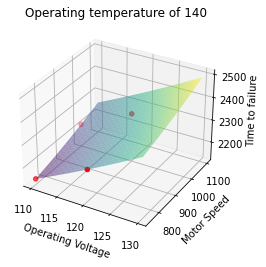

In [17]:
#Here we are plotting the points in 3D
Z1 = b0_b + coeff_b[0]*X1 + coeff_b[1]*X2 + coeff_b[2]*X1*X1 + coeff_b[3]*X2*X2 + coeff_b[4]*X1*X2 
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, Y, color='red')


#We are plotting the surface as shown in figure
ax.plot_surface(X1, X2, Z1, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('Operating Voltage')
ax.set_ylabel('Motor Speed')
ax.set_zlabel('Time to failure')
ax.set_title('Operating temperature of 140')

plt.show()


# c)

In [18]:
selected_rows = data[data['x2'] == 1000]

print(selected_rows)

      y   x1    x2   x3
2  2220  110  1000  140
6  2334  120  1000  140
7  2340  130  1000  180


In [19]:
Y = selected_rows['y'].values
x1 = selected_rows['x1'].values
x2 = selected_rows['x2'].values
x3 = selected_rows['x3'].values


In [20]:
xnl_c = np.column_stack((x1, x3, x1**2, x3**2, x1*x3, x2))
xnl_c

array([[  110,   140, 12100, 19600, 15400,  1000],
       [  120,   140, 14400, 19600, 16800,  1000],
       [  130,   180, 16900, 32400, 23400,  1000]], dtype=int64)

In [21]:
model4 = regress().fit(xnl_c, Y)
b0_c = model4.intercept_
print(b0_c)
coeff_c = model4.coef_
print(coeff_c)

1796.3198179029912
[ 1.70664504e-04 -5.03021819e-05  3.90013251e-02 -1.60966982e-02
  1.73537469e-02  0.00000000e+00]


In [22]:
#To plot surface get some equally spaced values of G and H
X1 = np.linspace(110,  130, 30)
X2 = np.linspace(120, 200, 30)


#This is required for plotting surface
X1, X2 = np.meshgrid(X1, X2)


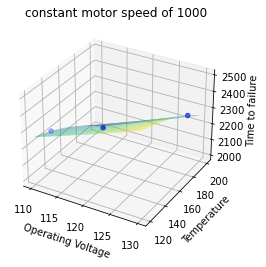

In [23]:
#Here we are plotting the points in 3D
Z1 = b0_c + coeff_c[0]*X1 + coeff_c[1]*X2 + coeff_c[2]*X1*X1 + coeff_c[3]*X2*X2 + coeff_c[4]*X1*X2 
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x3, Y, color='blue')


#We are plotting the surface as shown in figure
ax.plot_surface(X1, X2, Z1, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('Operating Voltage')
ax.set_ylabel('Temperature')
ax.set_zlabel('Time to failure')
ax.set_title('constant motor speed of 1000')

plt.show()


# d)

In [24]:
selected_rows = data[data['x3'] == 140]

print(selected_rows)

      y   x1    x2   x3
0  2145  110   750  140
2  2220  110  1000  140
4  2260  120   750  140
6  2334  120  1000  140


In [25]:
Y = selected_rows['y'].values
x1 = selected_rows['x1'].values
x2 = selected_rows['x2'].values
x3 = selected_rows['x3'].values


In [26]:
temp_d = 140*np.ones((10, 1))
xnl_d = np.column_stack((x1, x2, x1**2, x2**2, x3))
xnl_d

array([[    110,     750,   12100,  562500,     140],
       [    110,    1000,   12100, 1000000,     140],
       [    120,     750,   14400,  562500,     140],
       [    120,    1000,   14400, 1000000,     140]], dtype=int64)

In [27]:
model5 = regress().fit(xnl_d, Y)
b0_d = model5.intercept_
print(b0_d)
coeff_d = model5.coef_
print(coeff_d)

1447.082256903681
[2.16442033e-04 9.73060907e-08 4.97816676e-02 1.70285659e-04
 0.00000000e+00]


In [28]:
#To plot surface get some equally spaced values of G and H
X1 = np.linspace(100,  150, 30)
X2 = np.linspace(600, 1200, 30)


#This is required for plotting surface
X1, X2 = np.meshgrid(X1, X2)


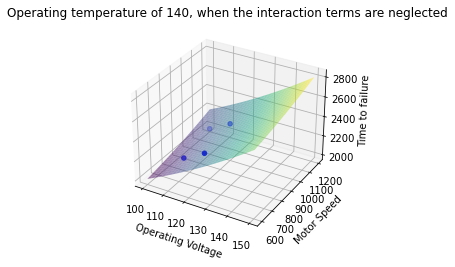

In [29]:
#Here we are plotting the points in 3D
Z1 = b0_d + coeff_d[0]*X1 + coeff_d[1]*X2 + coeff_d[2]*X1*X1 + coeff_d[3]*X2*X2 + coeff_d[4]*X1*X2 
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, Y, color='blue')


#We are plotting the surface as shown in figure
ax.plot_surface(X1, X2, Z1, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('Operating Voltage')
ax.set_ylabel('Motor Speed')
ax.set_zlabel('Time to failure')
ax.set_title('Operating temperature of 140, when the interaction terms are neglected')
plt.show()


In [30]:
res_d = Y - model5.predict(xnl_d)
res_d

array([-0.25,  0.25,  0.25, -0.25])

# e)


In [59]:
# to show the goodness of fit analysis,
# model1 = with interaction  
# model2 = without interaction 

Y = data.iloc[:,0].values
x1 = data.iloc[:,1].values 
x2 = data.iloc[:,2].values
x3 = data.iloc[:,3].values
ones_col = np.ones(np.size(x1))

#model 1
xnl_interaction = np.column_stack((x1, x2, x3, x1**2, x2**2, x3**2, x1*x2, x2*x3, x1*x3, x1*x2*x3))

model_interaction = regress().fit(xnl_interaction, Y)

#model 2
xnl_non_interaction = np.column_stack((x1, x2, x3, x1**2, x2**2, x3**2, ))

model_non_interaction = regress().fit(xnl_non_interaction, Y)


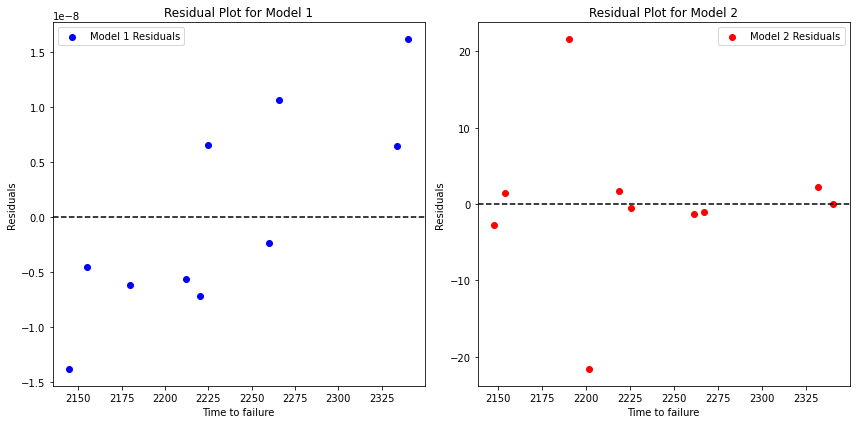

RMSE for Model 1: 8.926738460529205e-09
RMSE for Model 2: 9.776352650426423


In [66]:
y_pred_model1 = model_interaction.predict(xnl_interaction)
y_pred_model2 = model_non_interaction.predict(xnl_non_interaction)

# Calculate residuals

residuals_model1 = Y - y_pred_model1

selected_rows = data[data['x3'] == 140]

residuals_model2 = Y - y_pred_model2

# Plot residual plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_model1, residuals_model1, c='blue', label='Model 1 Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot for Model 1')
plt.xlabel('Time to failure')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_pred_model2, residuals_model2, c='red', label='Model 2 Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot for Model 2')
plt.xlabel('Time to failure')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse_model1 = np.sqrt(mean_squared_error(Y, y_pred_model1))
rmse_model2 = np.sqrt(mean_squared_error(Y, y_pred_model2))

print("RMSE for Model 1:", rmse_model1)
print("RMSE for Model 2:", rmse_model2)


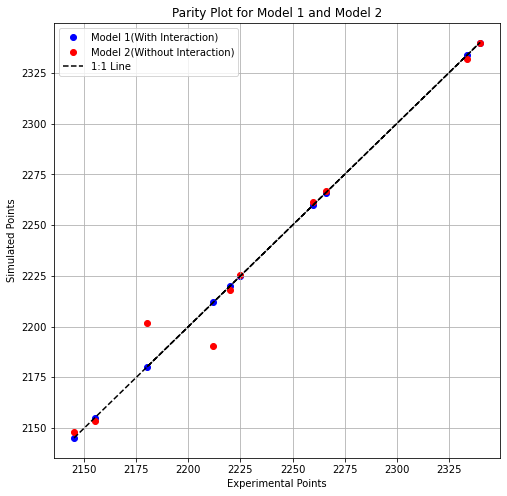

In [65]:
# Assuming you have experimental and simulated data
experimental_points = Y
simulated_points_model1 = y_pred_model1
simulated_points_model2 = y_pred_model2

# Plotting the parity plot for both models
plt.figure(figsize=(8, 8))

# Plot Model 1
plt.scatter(experimental_points, simulated_points_model1, color='blue', label='Model 1(With Interaction)')
# Plot Model 2
plt.scatter(experimental_points, simulated_points_model2, color='red', label='Model 2(Without Interaction)')

# Plotting the 1:1 line
plt.plot(experimental_points, experimental_points, color='black', linestyle='--', label='1:1 Line')

plt.title('Parity Plot for Model 1 and Model 2')
plt.xlabel('Experimental Points')
plt.ylabel('Simulated Points')
plt.legend()
plt.grid(True)
plt.show()